# Supervised Deep Learning (Part 1): 
# Artificial Neural Networks

In [1]:
# importing

import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

## Data Preprocessing

In [3]:
dataset = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 1 - Artificial Neural Networks\\Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

### Encoding Categorical Data

In [8]:
# encoding the gender column

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
X[:, 2]

array([0, 0, 0, ..., 0, 1, 0], dtype=object)

In [10]:
# one hot encoding the geography column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [14]:
# sequence of layers

ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the second hidden layer

In [16]:
# just copy, change if you want to

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

### Training the ANN on the Training Set

In [19]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
250/250 [==============================] - 3s 918us/step - loss: 0.5436 - accuracy: 0.7544
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8036
Epoch 3/50
250/250 [==============================] - 0s 775us/step - loss: 0.4435 - accuracy: 0.8044
Epoch 4/50
250/250 [==============================] - 0s 798us/step - loss: 0.4357 - accuracy: 0.8048
Epoch 5/50
250/250 [==============================] - 0s 802us/step - loss: 0.4309 - accuracy: 0.80560s - loss: 0.4395 - accuracy: 0.
Epoch 6/50
250/250 [==============================] - 0s 767us/step - loss: 0.4266 - accuracy: 0.8066
Epoch 7/50
250/250 [==============================] - 0s 759us/step - loss: 0.4233 - accuracy: 0.8083
Epoch 8/50
250/250 [==============================] - 0s 766us/step - loss: 0.4193 - accuracy: 0.8101
Epoch 9/50
250/250 [==============================] - 0s 776us/step - loss: 0.4158 - accuracy: 0.8104
Epoch 10/50
250/250 [==============================]

## Part 4 - Making the predictions and evaluating the model

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [20]:
ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.50

array([[False]])

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

In [21]:
proba = ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) 
print('The probability of the customer leaving is: ', proba * 100, '%') 

The probability of the customer leaving is:  [[2.3284078]] %


### Predicting on the test set

In [22]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Confusion Matrix for Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accu = accuracy_score(y_test, y_pred)

print('conf_matrix =', cm , 'accuracy score =', accu)

conf_matrix = [[1520   75]
 [ 199  206]] accuracy score = 0.863


# Supervised Deep Learning (Part 2): 
# Convolutional Neural Networks (CNN)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

In [28]:
# preprocessing the training set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 2 - Convolutional Neural Networks\\dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [29]:
# preprocessing the test set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 2 - Convolutional Neural Networks\\dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

In [30]:
cnn = tf.keras.models.Sequential()

In [31]:
# step 1 - convolution

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64, 64, 3]))

In [32]:
# step 2 - pooling

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [33]:
# adding a second convolutional layer

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [34]:
# step 3 - flattening

cnn.add(tf.keras.layers.Flatten())

In [35]:
# step 4 - full connection

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [36]:
# step 5 - output layer

cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the CNN

In [37]:
# compiling the CNN

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
# training and evaluating the CNN

cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 222s 885ms/step - loss: 0.6689 - accuracy: 0.5824 - val_loss: 0.6868 - val_accuracy: 0.6005
Epoch 2/25
250/250 [==============================] - 31s 125ms/step - loss: 0.6038 - accuracy: 0.6740 - val_loss: 0.5721 - val_accuracy: 0.7080
Epoch 3/25
250/250 [==============================] - 29s 117ms/step - loss: 0.5655 - accuracy: 0.7099 - val_loss: 0.5283 - val_accuracy: 0.7410
Epoch 4/25
250/250 [==============================] - 29s 116ms/step - loss: 0.5345 - accuracy: 0.7299 - val_loss: 0.5118 - val_accuracy: 0.7475
Epoch 5/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5127 - accuracy: 0.7441 - val_loss: 0.4947 - val_accuracy: 0.7670
Epoch 6/25
250/250 [==============================] - 30s 120ms/step - loss: 0.4915 - accuracy: 0.7654 - val_loss: 0.4900 - val_accuracy: 0.7610
Epoch 7/25
250/250 [==============================] - 30s 119ms/step - loss: 0.4777 - accuracy: 0.7690 - val_loss: 0.4673 - val_a

In [42]:
# part 4 - making a single prediction

from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 2 - Convolutional Neural Networks\\dataset\\single_prediction\\cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)

# add extra dimension corresponding to the batch
test_image = np.expand_dims(test_image, axis = 0)

# prediction

result = cnn.predict(test_image/255.0)

In [40]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

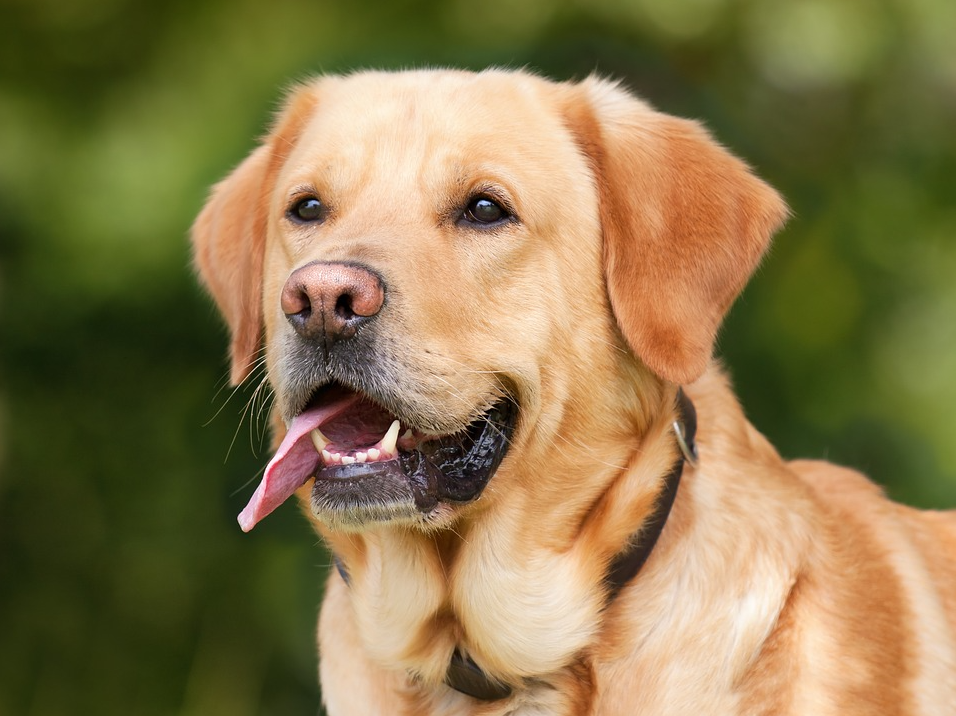

In [43]:
if result[0][0] > 0.50:
    prediction = 'dog'
    
else:
    prediction = 'cat'

In [44]:
prediction

'dog'

# Supervised Deep Learning (Part 3): 
# Recurrent Neural Networks (RNN)

## Part 1 - Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# importing the dataset

dataset_train = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 3 - Recurrent Neural Networks\\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# creating a data structure with 60 timesteps and 1 output (you can experiment with different timesteps)
# too low of a timestep may lead to overfitting, and too much is bs

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

# make into numpy arrays (keras only accepts numpy arrays)

X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
# X_train

In [10]:
# reshaping

X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [12]:
# X_train

## Part 2 - Building and Training the RNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [19]:
# initializing the RNN

regressor = Sequential()

# adding the first LSTM layer and some dropout regularization (to not overfit)

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.20))

In [20]:
# adding the second LSTM layer and some dropout regularization (to not overfit)

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

In [21]:
# adding the third LSTM layer and some dropout regularization (to not overfit)

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.20))

In [22]:
# adding the fourth LSTM layer and some dropout regularization (to not overfit)

regressor.add(LSTM(units = 50, return_sequences = False)) # no return for last layer
regressor.add(Dropout(rate = 0.20))

In [23]:
# adding the output layer

regressor.add(Dense(units = 1))

In [24]:
# compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# fitting the RNN to the training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 68ms/step - loss: 0.0474
Epoch 2/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0047: 
Epoch 12/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0044
Epoch 13/100
38/38 [==

## Part 3 - Making the predictions and visualizing the results

In [26]:
# importing the test dataset

dataset_test = pd.read_csv('C:\\Users\\henri\\Documents\\Documents\\Python and Machine Learning\\Deep Learning A-Z Udemy Files\\Part 3 - Recurrent Neural Networks\\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
# getting the predicted stock price of Jan 2017

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [32]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

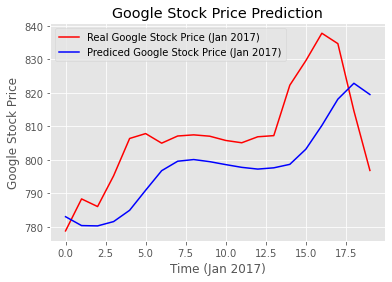

In [36]:
# visualizing the result

plt.style.use('ggplot')
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price (Jan 2017)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Prediced Google Stock Price (Jan 2017)')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time (Jan 2017)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

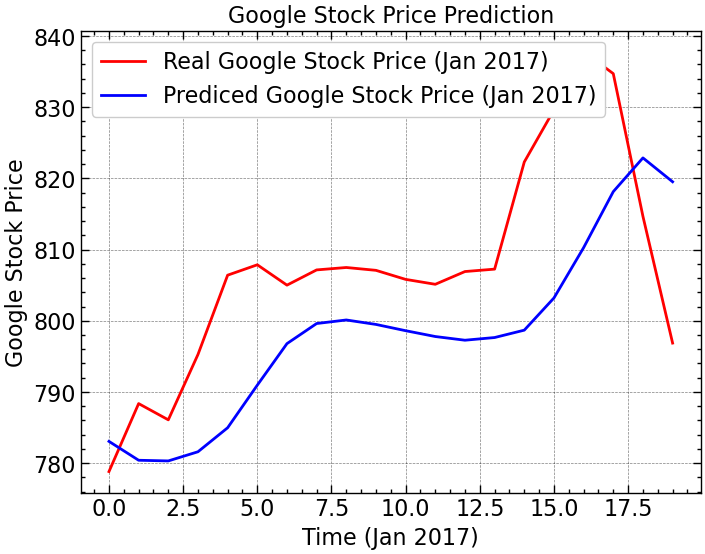

In [37]:
# visualizing the result

plt.style.use('default')
plt.style.use(['science', 'notebook', 'grid', 'no-latex'])
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price (Jan 2017)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Prediced Google Stock Price (Jan 2017)')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time (Jan 2017)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()